In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
import yfinance as yf
from pyESN import ESN
import matplotlib.pyplot as plt

In [7]:
stock_symbol = "TSLA"

# Define the date range
start_date = "2019-01-01"
end_date = "2023-01-31"

stock_data = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d' ,progress=False)

amazon = stock_data["Close"].values

In [8]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          sparsity=0.2,
          random_state=23,
          spectral_radius=1.2,
          noise = 0.005)

In [9]:
trainlen = 100

validation_set = []
for i in range(0,100):
    pred_training = esn.fit(np.ones(trainlen),amazon[i:trainlen+i])
    prediction = esn.predict(np.ones(5))
    validation_set.append(prediction[0])
    
def MSE(prediction, actual):
    return np.mean(np.power(np.subtract(np.array(prediction),actual),2))
    
def run_echo(sr, n, window):
    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          sparsity=0.2,
          random_state=23,
          spectral_radius=sr,
          noise = n)

    trainlen = 100
    current_set = []
    for i in range(0,100):
        pred_training = esn.fit(np.ones(trainlen),amazon[i:trainlen+i])
        prediction = esn.predict(np.ones(window))
        current_set.append(prediction[0])
    current_set = np.reshape(np.array(current_set),(-1,100))
    mse = MSE(current_set, amazon[trainlen:trainlen+100])
    
    return (mse, current_set)

[[12.7595341  12.41204574 11.91406954 12.34595804 12.56707925 11.41860593
  12.16486969 12.60434114 13.64259772 13.3294127  14.15101369 14.38536981
  13.99050474 14.37855679 14.30167723 15.03424297 14.91794976 15.33731378
  14.34016855 15.24938097 14.766669   14.01015908 14.00292211 14.69319856
  14.72324448 15.48648591 14.57549487 15.43984586 15.97794426 15.49503365
  15.42226209 15.96060775 16.29777467 16.8954665  17.24574963 16.77065543
  17.28631428 17.09382928 17.54387914 17.00287145 17.38252289 17.71840781
  15.82920562 15.13181413 16.04100445 16.48938995 16.18100062 15.68119844
  16.21010415 15.10325243 15.68911832 15.6538777  15.78997046 15.22751316
  15.54056636 15.55951541 14.3764153  14.48375924 14.40732844 15.08469745
  15.04242409 14.5375925  15.18122026 14.08654296 14.27504693 14.4379263
  14.46198371 14.99477118 14.83864395 14.96601467 14.31082748 15.51892153
  15.40220909 15.60175923 15.75830861 16.55144163 16.21549836 16.39602237
  16.5853736  16.2078983  16.36436738 1

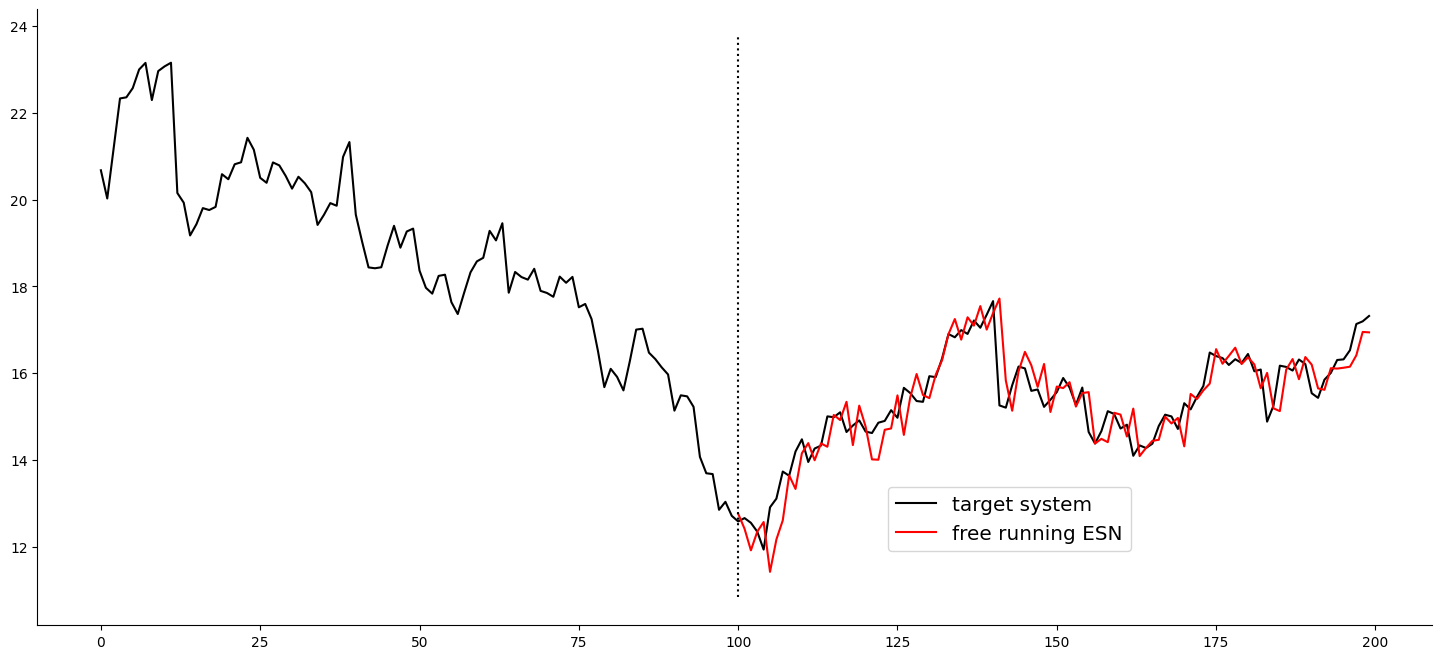

In [10]:
error, validation_set = run_echo(1.2, .005,5)
print(validation_set)

future = 100
plt.figure(figsize=(18,8))
plt.plot(range(0,trainlen+future),amazon[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+100),validation_set.reshape(-1,1),'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,0.12),fontsize='x-large')

sns.despine();